## <span style="color:blue"> Computer Vision - Winter 2024

## <span style="color:blue"> Exercise 3 </span>
**Reichman University**

**Lecturer:** Prof. Yael Moses, RUNI

**TA:** Eyal Friedman, RUNI

    
    
**Submission date: 9.2.24** \
Note: In case you need an extension for any reason, you can submit it by 14.2.24. \
No extra extensions will be given.
In case you are in miluim - please contact Yael directly.

**Your name: [Your Name]**
**Your ID: [Your ID]**

In this exercise, you will practice projection matrices and epipolar geometry related tasks.



## <span style="color:blue"> Submission guidelines:</span>

1. Your **zip** file should include the following files only:
   - ex3.ipynb
   - images you use that were not given 
2. You should use Jupyter Notebook.
3. Name the zip file **'ex3_ID_ID.zip'** and **do not** include any additional directories.
4. Submit using *Moodle*.
5. Submit on time!
6. You can submit this assignment in pairs (no triplets).
   * In the case of pair submission, both IDs and names should be added to the notebook.
   * One should submit the homework, and the other should submit a simple text file named: ID_ID.txt and nothing else.
   *Please make sure that your collaborator submits the HW.

## Read the following instructions carefully:

1. Write **efficient vectorized** code. 
2. You are responsible for the correctness of your code and should add as many tests as you see fit. Do not submit your tests unless requested.
3. Use `Python 3` and `numpy 1.18.5` or above. Changes to the configuration we provided are at your own risk. Before submitting the exercise, restart the kernel and run the notebook from start to finish to make sure everything works.
4. You are allowed to use functions and methods from the [Python Standard Library](https://docs.python.org/3/library/) and [numpy](https://www.numpy.org/devdocs/reference/) only. Any other imports are forbidden unless provided by us.
5. Your code must run without errors. Note, **Code that fails to run will not be graded.**
6. Document your code properly.
7. Go over Warmup Python - you can find relevant python functions that will make your life easier.



In [2]:
import cv2

# This opens an inteactive figure - use it in part B
import matplotlib
matplotlib.use('Agg')

import matplotlib.pyplot as plt
import numpy as np
from scipy.linalg import null_space

# This specifies the way plots behave in jupyter notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 8.0) # set default size of plots
plt.rcParams['image.cmap'] = 'gray'


In [3]:
import platform
print("Python version: ", platform.python_version())
print("Numpy version: ", np.__version__)

Python version:  3.10.11
Numpy version:  1.23.5


## <span style="color:blue">Section A: Projection

In this part you will go over projection matrix,  and use them to project 3D points to an image.



## <span style="color:blue">Part A1: Projection Matrix 
Fill the missing values, given partial values of the parameters of the left and right cameras.




**Right image parameters:**
The projection matrix of the right image:

In [3]:
MR = np.array([[1100.504780,          0,   331.023000,   0],
               [0,          1097.763735,   259.386377,   0],
               [0,                    0,            1,   0]])

The rotation matrix of the right image:

In [4]:
RR = np.array([[1,0,0],
               [0,1,0],
               [0,0,1]])

The focal length of the right image:

In [5]:
fR = 1.0

From here on, replace "none" with your answers to the questions. In addition, if there are more than a single possible solution, choose one.
Compute the right image center (principal point):


In [6]:
OxR = MR[0, 2]
OyR = MR[1, 2]

Compute the right image scale factor which is consistent with MR:

In [7]:
SxR = MR[0, 0]
SyR = MR[1, 1]

Compute the right image intrinsic matrix which is consistent with MR:

In [8]:
MintR = np.array([[SxR, 0, OxR],
                  [0, SyR, OyR],
                  [0, 0, 1]])

 
**Left image parameters**
 
Left image center (principal point):

In [9]:
OxL = 320.798101 
OyL = 236.431326

Scale factor:

In [10]:
SxL = 1095.671499
SyL = 1094.559584 

Focal length of the left image: 

In [11]:
fL = 1

Translation vector w.r.t. the world origin:

In [12]:
TL = -np.array([[178.2218,18.8171,-13.7744]]).T

Rotation matrix of the left image:

In [13]:
RL = np.array([[ 0.9891,    0.0602,   -0.1346],
               [-0.0590,    0.9982,    0.0134],
               [0.1351,   -0.0053,    0.9908]])

Compute the intrinsic projection matrix of the left camera: 

In [14]:
MintL = np.array([[SxL, 0, OxL],
                  [0, SyL, OyL],
                  [0, 0, fL]])

Compute the projection matrix of the left camera

In [15]:
ML = np.dot(MintL, np.hstack((RL, -TL)))

Compute the COP of the left and the right images, in Cartesian coordinates:   

(You may use the the function *null_space* from *scipy.linalg*) 

In [16]:
CL = null_space(ML)
CR= null_space(MR)

CL = CL / CL[-1]  # Normalize to make the last element 1
CR = CR / CR[-1]
# CR = np.array([0, 0, 0, 1])  # Right camera is at the origin in its own coordinate system

In [17]:
# print(CR.shape)
print(CL)

[[-173.29854444]
 [ -29.59579838]
 [  37.37401658]
 [   1.        ]]


Compute the distance between CL and CR:
    

In [18]:
D = np.linalg.norm(CL[:3] - CR[:3])

## <span style="color:blue">Part A2: Hands on Triangulation

Write a function p = proj(M,P) that recieves as input the 3D point P in Euclidean coordinates and a projection matrix M, and outputs the 2D  Euclidean coordinates of the projected point.


In [19]:
# Your code for proj function
def proj(M,P):
    # Convert P to homogeneous coordinates
    P_homogeneous = np.append(P, 1)  # Append 1 to the end of P
    # Apply the projection matrix M
    p_homogeneous = np.dot(M, P_homogeneous)
    # Convert back to Euclidean coordinates
    p = p_homogeneous[:2] / p_homogeneous[2]
    return p

**<span style="color:blue">Answer Quesion:**\
Given object points in the world coordinate system,  P=(-140,50,1200) and Q=(30,100,2000).

a.	What are the coordinates (Euclidean) of the points in the left camera coordinate system?\
b.	What are the coordinates (Euclidean) of the points in the right camera coordinate system?
    
Note: the camera coordinate system rather than the image coordinate system (PL means the 3D coordinates in the left **camera** cordinates system, and pL means the 2D coordinates in the left **image** coordinates system.
   

**<span style="color:blue">Your answer:**\
   ...
    
    
    

In [20]:
PL = None
PR = None
QL = None
QR = None

In [21]:
P = np.array([[-140],[50],[1200]])
pL = proj(ML,P)
pR = proj(MR,P)

Q = np.array([[30],[100],[2000]]) 
qL = proj(ML,Q)
qR = proj(MR,Q)

### Read two images and display the projections of P and Q on the two given images ###

(<matplotlib.image.AxesImage at 0x2b176e27880>,
 Text(0.5, 1.0, 'Right image'),
 <matplotlib.collections.PathCollection at 0x2b176eef910>)

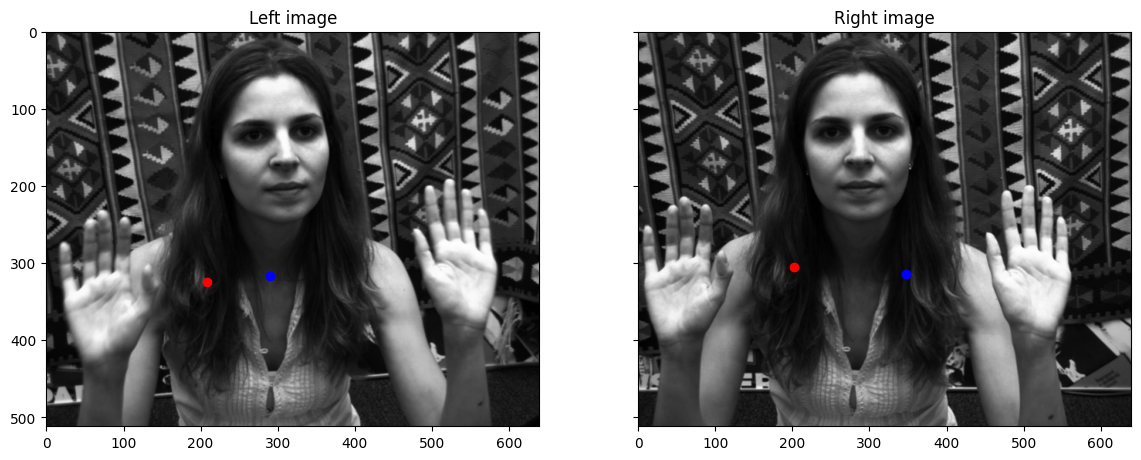

In [22]:
imL = cv2.imread('left.tif', cv2.IMREAD_GRAYSCALE)
imR = cv2.imread('right.tif', cv2.IMREAD_GRAYSCALE)
    
plt.rcParams['figure.figsize'] = (14.0, 14.0) 
f, ((ax1, ax2)) = plt.subplots(1, 2, sharex='col', sharey='row')

ax1.imshow(imL, cmap='gray'), ax1.set_title('Left image'), ax1.scatter(pL[0], pL[1], color='r'), \
    ax1.scatter(qL[0],qL[1], color = 'b')
ax2.imshow(imR, cmap='gray'), ax2.set_title('Right image'), ax2.scatter(pR[0], pR[1], color = 'r'), \
    ax2.scatter(qR[0],qR[1], color = 'b')

**<span style="color:blue"> Answer Question:**\
Look at the projection of each of the points in the two images. One pair looks as expected, and the other does not. Please give a short explanation of what may have caused it.

**<span style="color:blue">Your answer:**\
   ...
    
    
    

## <span style="color:blue"> Part B: Epipolar Geometry
Compute the fundamental matrix F and the epipoles eL and eR of the left and right images, using their projection matrices.\
Note, you should normalize F by F(3,3) for improved precision.

For the epipoles' computation use the MR and ML and the Center of projections.

**<span style="color:blue">Answer Question:**
Can you double check if they are correct using F? If so, check it.


**<span style="color:blue">Your answer:**\
   ...
    
    
    

In [30]:
import numpy as np

# Given rotation and translation for the left camera relative to the world origin
TL = -np.array([[178.2218, 18.8171, -13.7744]]).T
RL = np.array([[0.9891, 0.0602, -0.1346],
               [-0.0590, 0.9982, 0.0134],
               [0.1351, -0.0053, 0.9908]])

# Assuming MintL and MintR are defined as per previous definitions
# Here's a placeholder for demonstration
# MintL = np.array([...])  # Replace [...] with the actual MintL matrix
# MintR = np.array([...])  # Replace [...] with the actual MintR matrix

# Compute the skew-symmetric matrix of TL
T_x = np.array([[0, -TL[2, 0], TL[1, 0]],
                [TL[2, 0], 0, -TL[0, 0]],
                [-TL[1, 0], TL[0, 0], 0]])

# Compute the Essential Matrix E
E = T_x.dot(RL)

# Compute the Fundamental Matrix F
print(MintL.shape)
print(MintR.shape)
print(E.shape)
F = np.linalg.inv(MintL.T).dot(E).dot(np.linalg.inv(MintR))

# Normalizing F by its last singular value for improved precision
U, S, Vt = np.linalg.svd(F)
S[-1] = 0
F_normalized = U.dot(np.diag(S)).dot(Vt)

print("Essential Matrix E:\n", E)
print("Fundamental Matrix F:\n", F_normalized)



eL = MR @ CL
eR = ML @ CR
F = F_normalized

(3, 3)
(3, 3)
(3, 3)
Essential Matrix E:
 [[-1.7295006 -13.6498754 -18.8285596]
 [37.7020242 -0.1153567 174.7281252]
 [29.1270798 -176.7682113 -4.9209538]]
Fundamental Matrix F:
 [[-0.0000014 -0.0000113 -0.0137660]
 [0.0000313 -0.0000001 0.1492974]
 [0.0195270 -0.1573625 -2.7967284]]


## Epipolar lines ##

Click on three different points of the **right** image, and check if the epipolar lines on the left image pass through a pixel that corresponds to the one you picked in the right image. Output the set of epipolar lines overlayed on the pair of  images as shown below.

To do so you can use:
1. The code below opens the images in a seperate window. You can click on the right image and  capture the click's coordinates by using the function *plt.ginput*.
2. Take each point (this can be done by a loop) and calculate its epipolar line  on the left image using F.
3. Compute the two endpoints of the line in the image to plot it on the left image. \
    **Hint**: you have linear coefficients - (a,b,c). Calculate the y value in the image for x=0, and x=image.width and plot the result.\
    Use: ax2.plot((x0. xWidth),(yx0, yxWidth))
4. Use the set of the points of the right image that you collected, and draw the epipolar lines on the right image.

In [33]:
# This sould open a new figure window outside of jupyter notebook
%matplotlib qt  

imL = cv2.imread('left.tif', cv2.IMREAD_GRAYSCALE)
imR = cv2.imread('right.tif', cv2.IMREAD_GRAYSCALE)
    
plt.rcParams['figure.figsize'] = (14.0, 14.0) 
f, ((ax1, ax2)) = plt.subplots(1, 2, sharex='col', sharey='row')

ax1.imshow(imL, cmap='gray'), ax1.set_title('Left image')
ax2.imshow(imR, cmap='gray'), ax2.set_title('Right image')

data = plt.ginput(3)

x_val = [x[0] for x in data]
y_val = [x[1] for x in data]

ax2.scatter(x_val, y_val, color='r')

for x in data: 
    # Convert point to homogeneous coordinates
    point_hom = np.array([x[0], x[1], 1])
    # Calculate corresponding epipolar line in the left image
    print(f"F: {F}")
    print(f"point_hom: {point_hom}")
    epipolar_line = np.dot(F, point_hom)
    # Plot the epipolar line on the left image
    # Compute two points (at x=0 and x=max) on the line to plot it
    x_vals = [0, imL.shape[1]]
    y_vals = [-(epipolar_line[2] + epipolar_line[0]*x)/epipolar_line[1] for x in x_vals]
    ax1.plot(x_vals, y_vals)
    ax2.plot(x_vals, y_vals)

plt.show()
    

F: [[-0.0000014 -0.0000113 -0.0137660]
 [0.0000313 -0.0000001 0.1492974]
 [0.0195270 -0.1573625 -2.7967284]]
point_hom: [452.6317972 258.5690507 1.0000000]
F: [[-0.0000014 -0.0000113 -0.0137660]
 [0.0000313 -0.0000001 0.1492974]
 [0.0195270 -0.1573625 -2.7967284]]
point_hom: [291.7175115 170.3257327 1.0000000]
F: [[-0.0000014 -0.0000113 -0.0137660]
 [0.0000313 -0.0000001 0.1492974]
 [0.0195270 -0.1573625 -2.7967284]]
point_hom: [283.9313364 432.4602949 1.0000000]


In [25]:
%matplotlib inline

### This is what you should see:
![Epipolar](epipolarLines1.png "Epipolar Lines example")

##  <span style="color:blue">Part C : SIFT and RANSAC/LMedS
**Follow the matching to compute F.**

https://docs.opencv.org/master/da/de9/tutorial_py_epipolar_geometry.html 

The example attached here needs some twicks to make it work. First you need to uninstall the opencv package and to install to opencv-contrib package:
- pip uninstall opencv-python 

Then install the contrib version with this:
- pip install opencv-contrib-python

**<span style="color:red"> Now, you have to use those lines:**
- **sift = cv2.xfeatures2d.SIFT_create()**
- **kp1, des1 = sift.detectAndCompute(img1, None)**


Hereby, we will find the corresponding featues using the SIFT algorithm and match the closet points. The plotted figure showes the best 300 matches.


In [26]:
!pip uninstall opencv-python
!pip install opencv-contrib-python

(<matplotlib.image.AxesImage at 0x2b179b2c1f0>, Text(0.5, 1.0, 'Matches'))

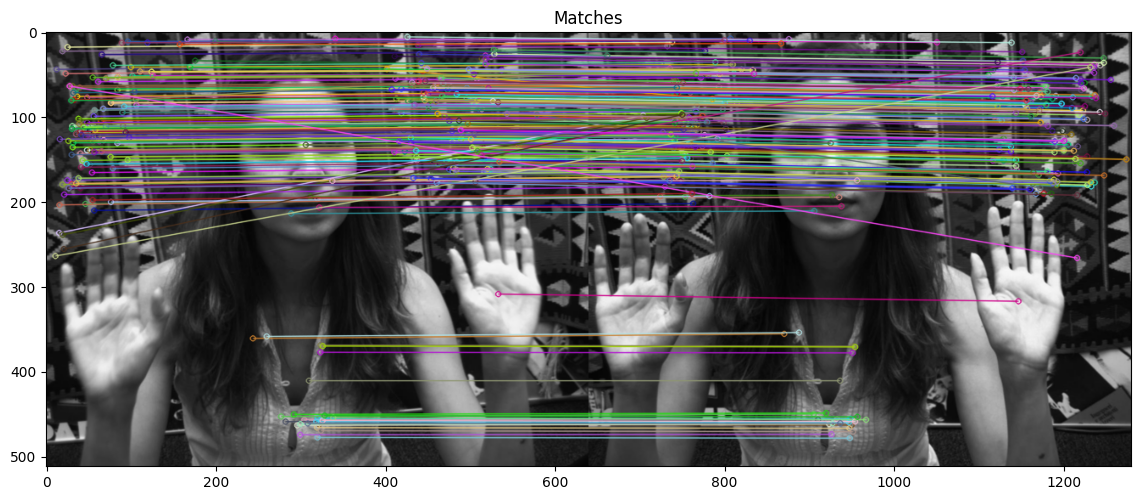

In [35]:
%matplotlib inline

imL = cv2.imread('Left.tif', cv2.IMREAD_GRAYSCALE)
imR = cv2.imread('Right.tif', cv2.IMREAD_GRAYSCALE)

# Initiate SIFT detector
# In the link above you need to change the next line from cv.SIFT to cv2.xfeatures2d.
# Instead of: sift = cv2.SIFT() use:
sift = cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(imL,None)
kp2, des2 = sift.detectAndCompute(imR,None)

# FLANN parameters
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)
# create FlannBasedMatcher object
flann = cv2.FlannBasedMatcher(index_params,search_params)

# Match descriptors.
matches = flann.knnMatch(des1,des2,k=2)

pts1 = []
pts2 = []
matching = []
# Building a list of points screened by ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.8*n.distance:
        pts2.append(kp2[m.trainIdx].pt)
        pts1.append(kp1[m.queryIdx].pt)
        matching.append(m)
        

# Sort them in the order of their distance.
matching = sorted(matching, key = lambda x:x.distance)
        
# Draw first 300 matches.
img3 = np.array([])
img3 = cv2.drawMatches(imL, kp1, imR, kp2, matching[:300], outImg = img3, flags =2)

plt.rcParams['figure.figsize'] = (14.0, 14.0) 
f, ((ax1)) = plt.subplots(1, 1, sharex='col', sharey='row')
ax1.imshow(img3, cmap='gray'), ax1.set_title('Matches')

<span style="color:blue"> Not for submission:

    Look at the obtain results.

    a. Do you think all matches are correct?
    b. In which regions of the scene, most of the reliable matches were found?
    c. Try the worst 200 mathces as well -- matching[-1-200:]

Now, we will use the found matches to compute **F** using *cv2.findFundamentalMat()*.

In [36]:
pts1 = np.int32(pts1)
pts2 = np.int32(pts2)

# Computing the F matrix
F_calc, mask = cv2.findFundamentalMat(pts1,pts2,cv2.FM_LMEDS)
# We select only inlier points
pts1 = pts1[mask.ravel()==1]
pts2 = pts2[mask.ravel()==1]

In [37]:
np.set_printoptions(formatter={'float' : '{:0.7f}'.format})
print(F_calc.T)
print(F)

[[0.0000020 -0.0000279 0.0097082]
 [0.0000253 0.0000030 -0.0261356]
 [-0.0112176 0.0240183 1.0000000]]
[[-0.0000014 -0.0000113 -0.0137660]
 [0.0000313 -0.0000001 0.1492974]
 [0.0195270 -0.1573625 -2.7967284]]


And now lets check the computed F_calc:
1. Use it to draw the epipolar line as in the example above (change F to F_calc.T)
2. Compute the distance between the computed epipoles by F and by F_calc in each of the images.

Hint: You can use scipy.linalg import null_space 

**<span style="color:blue">Answer Question:**\
    Do you see any differences?
    
**<span style="color:blue">Your answer:**\
    ...

### <span style="color:blue"> Your part in this section :) ###

#### Take two images by your camera and compute the epipolar geometry using LMedS ####

Please submit: 5 corresponding epipolar lines overlayed on   your pair of images.

(<matplotlib.image.AxesImage at 0x1501d7e4340>, Text(0.5, 1.0, 'Matches'))

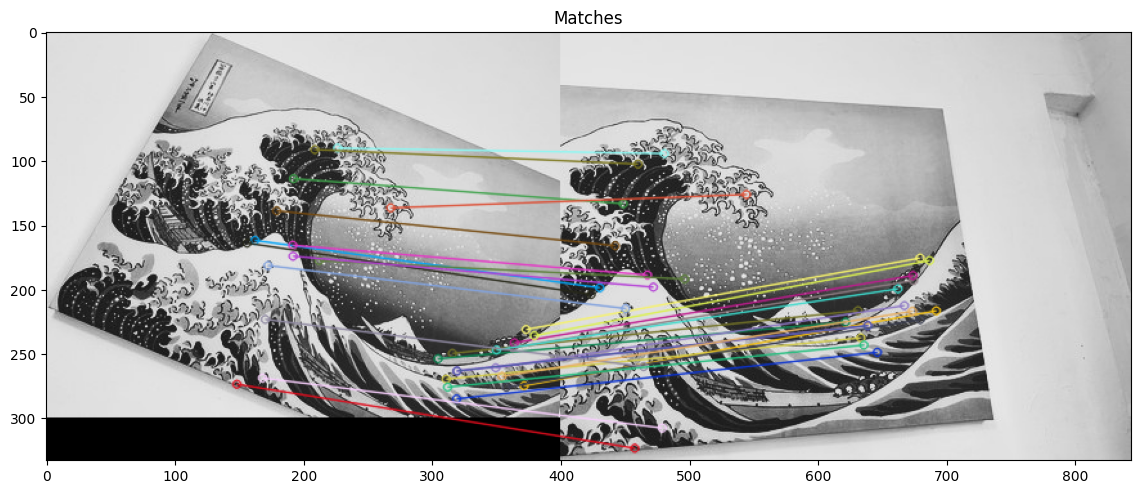

In [23]:
%matplotlib inline

imL = cv2.imread('left1.jpeg')
imR = cv2.imread('right1.jpeg')

# Initiate SIFT detector
# In the link above you need to change the next line from cv.SIFT to cv2.xfeatures2d.
# Instead of: sift = cv2.SIFT() use:
sift = cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(imL,None)
kp2, des2 = sift.detectAndCompute(imR,None)

# FLANN parameters
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)
# create FlannBasedMatcher object
flann = cv2.FlannBasedMatcher(index_params,search_params)

# Match descriptors.
matches = flann.knnMatch(des1,des2,k=2)

pts1 = []
pts2 = []
matching = []
# Building a list of points screened by ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.8*n.distance:
        pts2.append(kp2[m.trainIdx].pt)
        pts1.append(kp1[m.queryIdx].pt)
        matching.append(m)
        

# Sort them in the order of their distance.
matching = sorted(matching, key = lambda x:x.distance)
matching = matching[:30]
# Draw first 300 matches.
img3 = np.array([])
img3 = cv2.drawMatches(imL, kp1, imR, kp2, matching[:300], outImg = img3, flags =2)

plt.rcParams['figure.figsize'] = (14.0, 14.0) 
f, ((ax1)) = plt.subplots(1, 1, sharex='col', sharey='row')
ax1.imshow(img3, cmap='gray'), ax1.set_title('Matches')

In [24]:
pts1 = np.int32(pts1)
pts2 = np.int32(pts2)

# Computing the F matrix
F, mask = cv2.findFundamentalMat(pts1,pts2,cv2.FM_LMEDS)
# We select only inlier points
pts1 = pts1[mask.ravel()==1]
pts2 = pts2[mask.ravel()==1]
pts1=np.array(pts1)
pts2=np.array(pts2)
pts1 =pts1[:, np.newaxis, :]
pts2 =pts2[:, np.newaxis, :]
pts1=pts1[:30]
pts2=pts2[:30]

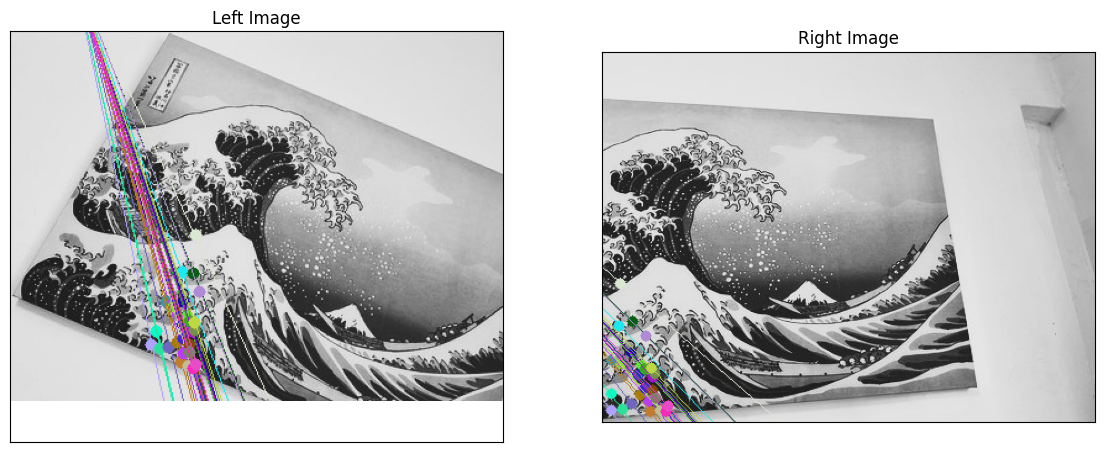

In [25]:
# This sould open a new figure window outside of jupyter notebook
%matplotlib inline
    
plt.rcParams['figure.figsize'] = (14.0, 14.0) 
f, ((ax1, ax2)) = plt.subplots(1, 2, sharex='col', sharey='row')

ax1.imshow(imL, cmap='gray'), ax1.set_title('Left image')
ax2.imshow(imR, cmap='gray'), ax2.set_title('Right image')


w= imL.shape[1]
for i in range(len(pts1)): 
    color = tuple(np.random.randint(0, 255, 3).tolist())

    image1Final = cv2.circle(imL, tuple(map(int, pts1[i].ravel())), 2, color, 5)
    image2Final = cv2.circle(imR, tuple(map(int, pts2[i].ravel())), 2, color, 5)

    line2 = cv2.computeCorrespondEpilines(pts1[i], 1, F)
    line1 = cv2.computeCorrespondEpilines(pts2[i], 2, F)

    # Compute 2 sample points on each line for plotting
    p1 = map(int, [0, -line1.ravel()[2] / line1.ravel()[1]])
    p2 = map(int, [w, -(line1.ravel()[2] + line1.ravel()[0] * w) / line1.ravel()[1]])
    p3 = map(int, [0, -line2.ravel()[2] / line2.ravel()[1]])
    p4 = map(int, [w, -(line2.ravel()[2] + line2.ravel()[0] * w) / line2.ravel()[1]])

    # Draw epilines on corresponding images
    image1Final = cv2.line(image1Final, tuple(p1), tuple(p2), color, 1)
    image2Final = cv2.line(image2Final, tuple(p3), tuple(p4), color, 1)


# Display the left image with colored epipolar lines
plt.subplot(121), plt.imshow(image1Final, cmap='gray')
plt.title('Left Image'), plt.xticks([]), plt.yticks([])

# Display the right image with colored epipolar lines
plt.subplot(122), plt.imshow(image2Final, cmap='gray')
plt.title('Right Image'), plt.xticks([]), plt.yticks([])

plt.show()
    

##  <span style="color:blue"> Part D: Answer the following question
    
Consider two rectified images that are related by translation along the $y$-axis.

1. What is the epipolar line on the bottom image for the point $(x, y)$ on the top image?
2. What is the Fundamental matrix of the pair of images? Explain your answer and prove that it is consistent with your answer to (1).
3. Where is the epipole of the top image? Prove your answer formally using your answer to (2).
    
    


**<span style="color:blue"> Answer:**